### Nguyen Thai Anh - st122910- Assignment 1

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
np.__version__, torch.__version__

('1.21.5', '1.13.0+cu117')

In [3]:
import matplotlib
matplotlib.__version__

'3.5.1'

## Question 1: Try a real corpus (instead of banana apple, try something real... on the internet....) - not so big!  Just so you have a good taste of real stuff....like 50 documents, each having 50 words...(really up to you)

## Data 

In [4]:
#specify the sentences / corpus
#corpus is defined as a set of documents
#document is basically a bunch of sentence(s)
corpus = [
    'he is a king',
    'he is a teacher',
    'she is a queen',
    'he is a man',
    'he is a professor',
    'she is a girl',
    'she is very beautiful',
    'I am very good',
    'I am a pressident',
    'he is a boy',
    'she is a woman',
    'Thailand has many temples',
    'yellow pagoda',
    'There are many temples in Thailand',
    'Vietnam has many pagodas',
    'Vietnam has many delicious dishes',
    'Data Science and AI Rise in the World',
    'Vietnam and Thailand are developing very fast in AI and Data Science',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
    'The capital of Vietnam is Hanoi',
    'The capital of Thailand is Bangkok',
    'NLP is too difficult',
    'ML is too easy',
    'CP is too difficult',
    'Learning to ride a motorbike is easy',
    'Learning to drive a car is easy',
    'Math is too difficult',
    'Linear is too easy',
    'DMM is too difficult',
    'I love you',
    'I hate you',
    'Spring is so warm',
    'winter is so cold',
    'I am so handsome'
]

In [5]:
#1. tokenize
#usually you use spaCy / NLTK to tokenize (but we gonna do this later on, we gonna have spaCy)
corpus_tokenized = [sent.split(" ") for sent in corpus]
corpus_tokenized  #we called each of this as "tokens", NOT words

[['he', 'is', 'a', 'king'],
 ['he', 'is', 'a', 'teacher'],
 ['she', 'is', 'a', 'queen'],
 ['he', 'is', 'a', 'man'],
 ['he', 'is', 'a', 'professor'],
 ['she', 'is', 'a', 'girl'],
 ['she', 'is', 'very', 'beautiful'],
 ['I', 'am', 'very', 'good'],
 ['I', 'am', 'a', 'pressident'],
 ['he', 'is', 'a', 'boy'],
 ['she', 'is', 'a', 'woman'],
 ['Thailand', 'has', 'many', 'temples'],
 ['yellow', 'pagoda'],
 ['There', 'are', 'many', 'temples', 'in', 'Thailand'],
 ['Vietnam', 'has', 'many', 'pagodas'],
 ['Vietnam', 'has', 'many', 'delicious', 'dishes'],
 ['Data', 'Science', 'and', 'AI', 'Rise', 'in', 'the', 'World'],
 ['Vietnam',
  'and',
  'Thailand',
  'are',
  'developing',
  'very',
  'fast',
  'in',
  'AI',
  'and',
  'Data',
  'Science'],
 ['warsaw', 'is', 'poland', 'capital'],
 ['berlin', 'is', 'germany', 'capital'],
 ['paris', 'is', 'france', 'capital'],
 ['The', 'capital', 'of', 'Vietnam', 'is', 'Hanoi'],
 ['The', 'capital', 'of', 'Thailand', 'is', 'Bangkok'],
 ['NLP', 'is', 'too', 'diffic

In [6]:
#2. numericalize

#2.1 get all the unique words
#we want to flatten this (basically merge all list)
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized)))  #vocabs is a term defining all unique words your system know

In [7]:
#2.2 assign id to all these vocabs
word2index = {v: idx for idx, v in enumerate(vocabs)}

In [8]:
word2index['AI']

51

In [9]:
vocabs.append('<UNK>') #chaky, can it be ##UNK, or UNKKKKKK, or anything
word2index['<UNK>'] = len(vocabs) -1  #usually <UNK> is 0

In [10]:
index2word = {v:k for k, v in word2index.items()}

index2word

{0: 'I',
 1: 'Science',
 2: 'she',
 3: 'warsaw',
 4: 'Data',
 5: 'paris',
 6: 'Rise',
 7: 'ML',
 8: 'Learning',
 9: 'too',
 10: 'pressident',
 11: 'easy',
 12: 'pagodas',
 13: 'so',
 14: 'good',
 15: 'he',
 16: 'are',
 17: 'There',
 18: 'the',
 19: 'and',
 20: 'teacher',
 21: 'fast',
 22: 'poland',
 23: 'Bangkok',
 24: 'Hanoi',
 25: 'motorbike',
 26: 'queen',
 27: 'germany',
 28: 'Math',
 29: 'The',
 30: 'professor',
 31: 'difficult',
 32: 'drive',
 33: 'Linear',
 34: 'woman',
 35: 'has',
 36: 'temples',
 37: 'beautiful',
 38: 'capital',
 39: 'you',
 40: 'NLP',
 41: 'car',
 42: 'developing',
 43: 'is',
 44: 'Vietnam',
 45: 'france',
 46: 'pagoda',
 47: 'man',
 48: 'dishes',
 49: 'yellow',
 50: 'girl',
 51: 'AI',
 52: 'of',
 53: 'hate',
 54: 'winter',
 55: 'king',
 56: 'in',
 57: 'very',
 58: 'a',
 59: 'berlin',
 60: 'warm',
 61: 'Thailand',
 62: 'World',
 63: 'ride',
 64: 'boy',
 65: 'many',
 66: 'Spring',
 67: 'CP',
 68: 'to',
 69: 'am',
 70: 'delicious',
 71: 'DMM',
 72: 'cold',
 73:

In [11]:
vocabs

['I',
 'Science',
 'she',
 'warsaw',
 'Data',
 'paris',
 'Rise',
 'ML',
 'Learning',
 'too',
 'pressident',
 'easy',
 'pagodas',
 'so',
 'good',
 'he',
 'are',
 'There',
 'the',
 'and',
 'teacher',
 'fast',
 'poland',
 'Bangkok',
 'Hanoi',
 'motorbike',
 'queen',
 'germany',
 'Math',
 'The',
 'professor',
 'difficult',
 'drive',
 'Linear',
 'woman',
 'has',
 'temples',
 'beautiful',
 'capital',
 'you',
 'NLP',
 'car',
 'developing',
 'is',
 'Vietnam',
 'france',
 'pagoda',
 'man',
 'dishes',
 'yellow',
 'girl',
 'AI',
 'of',
 'hate',
 'winter',
 'king',
 'in',
 'very',
 'a',
 'berlin',
 'warm',
 'Thailand',
 'World',
 'ride',
 'boy',
 'many',
 'Spring',
 'CP',
 'to',
 'am',
 'delicious',
 'DMM',
 'cold',
 'handsome',
 'love',
 '<UNK>']

### Prepare to train data

In [12]:
#move along the corpus
#to fit with our corpus, we gonna use window_size = 1
skipgrams = []

#for each corpus
for sent in corpus_tokenized:
    #for each sent ["apple", "banana", "fruit"]
    for i in range(1, len(sent) - 1): #start from 1 to second last
        center_word = sent[i]
        outside_words = [sent[i-1], sent[i+1]]  #window_size = 1
        for o in outside_words:
            skipgrams.append([center_word, o])
skipgrams
        
#here we want to create (banana, apple), (banana, fruit) append to some list

[['is', 'he'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'king'],
 ['is', 'he'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'teacher'],
 ['is', 'she'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'queen'],
 ['is', 'he'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'man'],
 ['is', 'he'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'professor'],
 ['is', 'she'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'girl'],
 ['is', 'she'],
 ['is', 'very'],
 ['very', 'is'],
 ['very', 'beautiful'],
 ['am', 'I'],
 ['am', 'very'],
 ['very', 'am'],
 ['very', 'good'],
 ['am', 'I'],
 ['am', 'a'],
 ['a', 'am'],
 ['a', 'pressident'],
 ['is', 'he'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'boy'],
 ['is', 'she'],
 ['is', 'a'],
 ['a', 'is'],
 ['a', 'woman'],
 ['has', 'Thailand'],
 ['has', 'many'],
 ['many', 'has'],
 ['many', 'temples'],
 ['are', 'There'],
 ['are', 'many'],
 ['many', 'are'],
 ['many', 'temples'],
 ['temples', 'many'],
 ['temples', 'in'],
 ['in', 'temples'],
 ['in', 'Thailand'],
 ['has', 'Vietnam'],
 ['has', 'many'],
 ['many', 'has'],
 ['many', 'pago

In [13]:
def random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        #for each sent ["Vietnam", "Thailand", "of"]
        for i in range(1, len(sent) - 1): #start from 1 to second last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-1]], word2index[sent[i+1]]]  #window_size = 1
            for o in outside_words:
                skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [14]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[19],
       [43],
       [10],
       [ 1],
       [58],
       [ 0],
       [61],
       [56],
       [ 1],
       [43]])


In [15]:
voc_size = len(vocabs)
voc_size

76

In [16]:
vocabs

['I',
 'Science',
 'she',
 'warsaw',
 'Data',
 'paris',
 'Rise',
 'ML',
 'Learning',
 'too',
 'pressident',
 'easy',
 'pagodas',
 'so',
 'good',
 'he',
 'are',
 'There',
 'the',
 'and',
 'teacher',
 'fast',
 'poland',
 'Bangkok',
 'Hanoi',
 'motorbike',
 'queen',
 'germany',
 'Math',
 'The',
 'professor',
 'difficult',
 'drive',
 'Linear',
 'woman',
 'has',
 'temples',
 'beautiful',
 'capital',
 'you',
 'NLP',
 'car',
 'developing',
 'is',
 'Vietnam',
 'france',
 'pagoda',
 'man',
 'dishes',
 'yellow',
 'girl',
 'AI',
 'of',
 'hate',
 'winter',
 'king',
 'in',
 'very',
 'a',
 'berlin',
 'warm',
 'Thailand',
 'World',
 'ride',
 'boy',
 'many',
 'Spring',
 'CP',
 'to',
 'am',
 'delicious',
 'DMM',
 'cold',
 'handsome',
 'love',
 '<UNK>']

### Module

In [17]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [18]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 76])

In [19]:
voc_size

76

In [20]:
input, label = random_batch(batch_size, corpus_tokenized)
input

array([[ 9],
       [43]])

In [21]:
label #context word

array([[31],
       [ 9]])

In [22]:
emb_size = 2 #usually, this can be 50, 100, or 300
model = Skipgram(voc_size, emb_size)

In [23]:
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)  #LongTensor basically means integer....

In [24]:
torch.LongTensor(2)

tensor([7382365578999377504, 2314885437407982191])

In [25]:
torch.LongTensor([2]) 

tensor([2])

In [26]:
input_tensor.shape

torch.Size([2, 1])

In [27]:
label_tensor.shape

torch.Size([2, 1])

In [28]:
all_vocabs

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
         72, 73, 74, 75],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
         72, 73, 74, 75]])

In [29]:
loss = model(input_tensor, label_tensor, all_vocabs)

In [30]:
loss

tensor(4.5740, grad_fn=<NegBackward0>)

In [31]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = Skipgram(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

### Training module

In [32]:
import time
num_epochs = 5000
starttime = time.time()
#for epoch
for epoch in range(num_epochs):
    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    endtime =time.time()
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | time: {(endtime - starttime)} ")

Epoch 1000 | Loss: 4.833241 | time: 1.3383855819702148
Epoch 2000 | Loss: 5.114820 | time: 2.630401134490967
Epoch 3000 | Loss: 1.729257 | time: 4.274210453033447
Epoch 4000 | Loss: 5.219905 | time: 5.806239604949951
Epoch 5000 | Loss: 2.898548 | time: 7.312983989715576


In [33]:

vocabs

['I',
 'Science',
 'she',
 'warsaw',
 'Data',
 'paris',
 'Rise',
 'ML',
 'Learning',
 'too',
 'pressident',
 'easy',
 'pagodas',
 'so',
 'good',
 'he',
 'are',
 'There',
 'the',
 'and',
 'teacher',
 'fast',
 'poland',
 'Bangkok',
 'Hanoi',
 'motorbike',
 'queen',
 'germany',
 'Math',
 'The',
 'professor',
 'difficult',
 'drive',
 'Linear',
 'woman',
 'has',
 'temples',
 'beautiful',
 'capital',
 'you',
 'NLP',
 'car',
 'developing',
 'is',
 'Vietnam',
 'france',
 'pagoda',
 'man',
 'dishes',
 'yellow',
 'girl',
 'AI',
 'of',
 'hate',
 'winter',
 'king',
 'in',
 'very',
 'a',
 'berlin',
 'warm',
 'Thailand',
 'World',
 'ride',
 'boy',
 'many',
 'Spring',
 'CP',
 'to',
 'am',
 'delicious',
 'DMM',
 'cold',
 'handsome',
 'love',
 '<UNK>']

In [34]:
he = torch.LongTensor([word2index['he']])
he

tensor([15])

In [35]:
he_center_embed = model.embedding_center_word(he)
he_outisde_embed = model.embedding_outside_word(he)

he_embed = (he_center_embed + he_outisde_embed) / 2
he_embed

tensor([[ 0.8111, -0.1896]], grad_fn=<DivBackward0>)

In [36]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

In [37]:
#find embedding of fruit, cat
print(get_embed('she'))
print(get_embed('king'))
print(get_embed('women'))

(-1.8223668336868286, 1.3845864534378052)
(-0.9080995321273804, -1.1038594245910645)
(1.6490548849105835, -0.5850120782852173)


### Plot

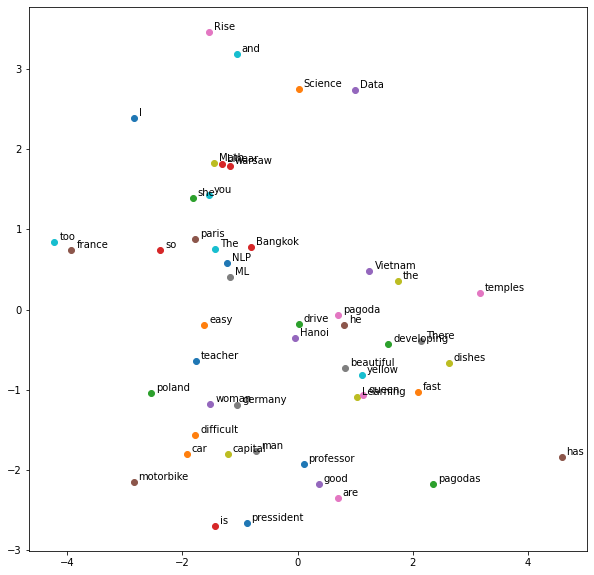

In [38]:
plt.figure(figsize=(10,10))
for i, word in enumerate(vocabs[:50]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## Question 2: Try a window size of 2

In [39]:
#let's make what we have made into a function (batch function)
#return a batches of data, e.g., =2 --> ['banana', 'apple'], ['banana', 'fruit']
#also i want these batches to be id, NOT token   --> [5, 4]
def random_batch(batch_size, corpus,window_size=1):
    skipgrams = []
    #for each corpus
    for sent in corpus_tokenized:
        for i in range(window_size, len(sent) - window_size):
            center_word = word2index[sent[i]]
            for z in range(window_size):
                outside_words = [word2index[sent[i-1-z]], word2index[sent[i+1+z]]] #Let it slide 2 from 1 time, every 2 from it encodes into 1 float
                #print(outside_words)
                for o in outside_words:
                    skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [40]:
input, label = random_batch(10,corpus_tokenized,2)
print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[51],
       [68],
       [44],
       [29],
       [68],
       [ 4],
       [ 1],
       [43],
       [70],
       [42]])


### Module

In [41]:
class Skipgram(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [42]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 76])

In [43]:
voc_size

76

In [44]:
input, label = random_batch(batch_size, corpus_tokenized)
input

array([[25],
       [52]])

In [45]:
label #context word

array([[58],
       [38]])

In [46]:
emb_size = 2 #usually, this can be 50, 100, or 300
model = Skipgram(voc_size, emb_size)

In [47]:
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)  #LongTensor basically means integer....

In [48]:
torch.LongTensor(2)

tensor([140104988400736,  94374129724704])

In [49]:
input_tensor.shape

torch.Size([2, 1])

In [50]:
label_tensor.shape

torch.Size([2, 1])

In [51]:
all_vocabs

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
         72, 73, 74, 75],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
         36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
         54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
         72, 73, 74, 75]])

In [52]:
loss = model(input_tensor, label_tensor, all_vocabs)

In [53]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = Skipgram(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

### Train module

In [54]:
import time
num_epochs = 5000
starttime = time.time()
#for epoch
for epoch in range(num_epochs):
    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    endtime =time.time()
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | time: {(endtime - starttime)}")

Epoch 1000 | Loss: 3.628041 | time: 1.6434082984924316
Epoch 2000 | Loss: 3.635846 | time: 3.261582851409912
Epoch 3000 | Loss: 4.308125 | time: 4.883720636367798
Epoch 4000 | Loss: 3.695831 | time: 6.462178468704224
Epoch 5000 | Loss: 2.724538 | time: 7.798093795776367


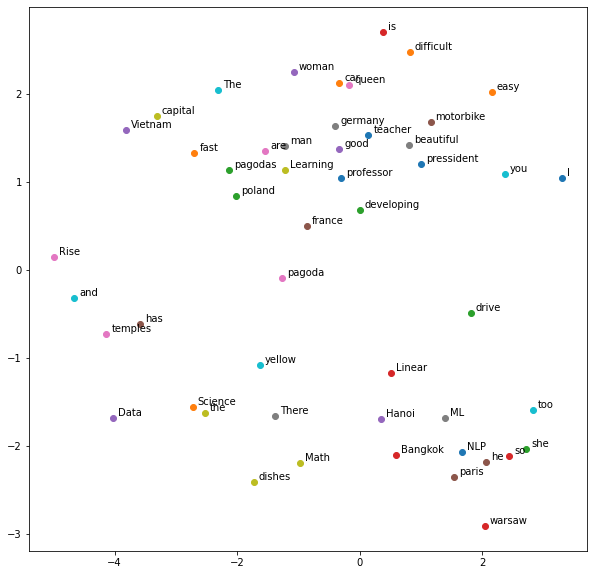

In [55]:
plt.figure(figsize=(10,10))
for i, word in enumerate(vocabs[:50]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## Question 3: Implement CBOW (instead of skipgrams)

In [56]:
#let's make what we have made into a function (batch function)
def random_batch(batch_size, corpus):
    cbows = []
    #for each corpus
    for sent in corpus_tokenized:
        for i in range(1, len(sent) - 1): #start from 1 to second last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-1]], word2index[sent[i+1]]]  #window_size = 1
            for j in outside_words:
                cbows.append([outside_words,center_word])
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(cbows)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([cbows[index][1]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([cbows[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)
    

In [57]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[19],
       [58],
       [43],
       [53],
       [44],
       [61],
       [57],
       [19],
       [35],
       [43]])


### Module

In [58]:
class CBOW(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(CBOW, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  #is a lookup table mapping all ids in voc_size, into some vector of size emb_size
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        #center_word, outside_word: (batch_size, 1)
        #all_vocabs: (batch_size, voc_size)
        
        #convert them into embedding
        center_word_embed  = self.embedding_center_word(center_word)     #(batch_size, 1, emb_size)
        outside_word_embed = self.embedding_outside_word(outside_word)   #(batch_size, 1, emb_size)
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)     #(batch_size, voc_size, emb_size)
        
        #bmm is basically @ or .dot , but across batches (i.e., ignore the batch dimension)
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        #(batch_size, 1, emb_size) @ (batch_size, emb_size, 1) = (batch_size, 1, 1) ===> (batch_size, 1)
        
        top_term_exp = torch.exp(top_term)  #exp(uo vc)
        #(batch_size, 1)
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
         #(batch_size, voc_size, emb_size) @ (batch_size, emb_size, 1) = (batch_size, voc_size, 1) = (batch_size, voc_size)
         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1) #sum exp(uw vc)
        #(batch_size, 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        #(batch_size, 1) / (batch_size, 1) ==mean==> scalar
        
        return loss_fn

In [59]:
batch_size = 2

def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, voc_size)
all_vocabs.shape

torch.Size([2, 76])

In [60]:
voc_size

76

In [61]:
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = CBOW(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [62]:
import time
num_epochs = 5000
starttime = time.time()
#for epoch
for epoch in range(num_epochs):
    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    endtime =time.time()
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | time: {(endtime - starttime)}")

Epoch 1000 | Loss: 2.341999 | time: 1.5776143074035645
Epoch 2000 | Loss: 1.699138 | time: 3.1399383544921875
Epoch 3000 | Loss: 0.771212 | time: 4.539310693740845
Epoch 4000 | Loss: 0.951467 | time: 5.8318986892700195
Epoch 5000 | Loss: 0.082912 | time: 7.128891944885254


### Plot

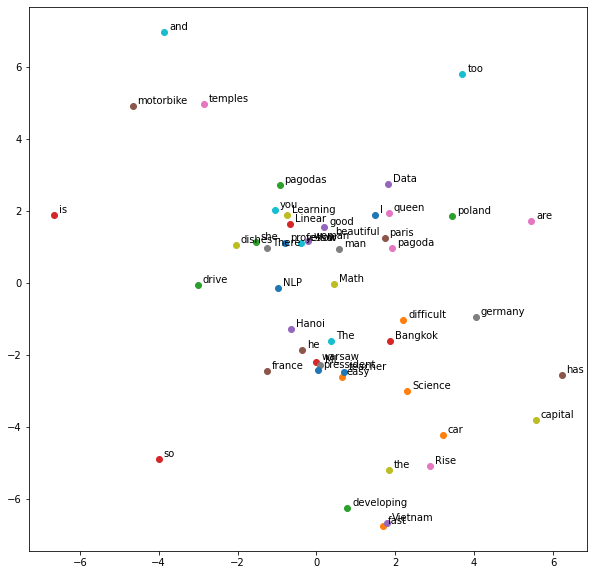

In [63]:
plt.figure(figsize=(10,10))
for i, word in enumerate(vocabs[:50]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## Question 4: Compare normal version of skipgrams vs. negative sampling version of skipgrams in terms of time (using real corpus)

In [64]:
#let's make what we have made into a function (batch function)
#return a batches of data, e.g., =2 --> ['banana', 'apple'], ['banana', 'fruit']
#also i want these batches to be id, NOT token   --> [5, 4]

def random_batch(batch_size, corpus):
    
    skipgrams = []

    #for each corpus
    for sent in corpus_tokenized:
        for i in range(1, len(sent) - 1): #start from 1 to second last
            center_word = word2index[sent[i]]
            outside_words = [word2index[sent[i-1]], word2index[sent[i+1]]]  #window_size = 1
            for o in outside_words:
                skipgrams.append([center_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)
    

In [65]:
input, label = random_batch(10, corpus_tokenized)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[68],
       [ 5],
       [35],
       [26],
       [65],
       [56],
       [58],
       [43],
       [35],
       [36]])


In [66]:
z = 0.001  #scaling up low frequency terms

In [67]:
#count all the occurrences of vocabs
from collections import Counter

word_count = Counter(flatten(corpus_tokenized))
word_count

Counter({'he': 5,
         'is': 24,
         'a': 11,
         'king': 1,
         'teacher': 1,
         'she': 4,
         'queen': 1,
         'man': 1,
         'professor': 1,
         'girl': 1,
         'very': 3,
         'beautiful': 1,
         'I': 5,
         'am': 3,
         'good': 1,
         'pressident': 1,
         'boy': 1,
         'woman': 1,
         'Thailand': 4,
         'has': 3,
         'many': 4,
         'temples': 2,
         'yellow': 1,
         'pagoda': 1,
         'There': 1,
         'are': 2,
         'in': 3,
         'Vietnam': 4,
         'pagodas': 1,
         'delicious': 1,
         'dishes': 1,
         'Data': 2,
         'Science': 2,
         'and': 3,
         'AI': 2,
         'Rise': 1,
         'the': 1,
         'World': 1,
         'developing': 1,
         'fast': 1,
         'warsaw': 1,
         'poland': 1,
         'capital': 5,
         'berlin': 1,
         'germany': 1,
         'paris': 1,
         'france': 1,
         '

In [68]:
num_total_words = sum([c for w, c in word_count.items()])
num_total_words

165

In [69]:
unigram_table = []

for v in vocabs:
    uw = word_count[v]/num_total_words
    uw_alpha = uw ** 0.75
    uw_alpha_dividebyz = int(uw_alpha / z)
    # print("vocab: ", v)
    # print("distribution: ", uw_alpha_dividebyz)
    unigram_table.extend([v] * uw_alpha_dividebyz)
    
Counter(unigram_table)

Counter({'I': 72,
         'Science': 36,
         'she': 61,
         'warsaw': 21,
         'Data': 36,
         'paris': 21,
         'Rise': 21,
         'ML': 21,
         'Learning': 36,
         'too': 83,
         'pressident': 21,
         'easy': 61,
         'pagodas': 21,
         'so': 49,
         'good': 21,
         'he': 72,
         'are': 36,
         'There': 21,
         'the': 21,
         'and': 49,
         'teacher': 21,
         'fast': 21,
         'poland': 21,
         'Bangkok': 21,
         'Hanoi': 21,
         'motorbike': 21,
         'queen': 21,
         'germany': 21,
         'Math': 21,
         'The': 36,
         'professor': 21,
         'difficult': 61,
         'drive': 21,
         'Linear': 21,
         'woman': 21,
         'has': 49,
         'temples': 36,
         'beautiful': 21,
         'capital': 72,
         'you': 36,
         'NLP': 21,
         'car': 21,
         'developing': 21,
         'is': 235,
         'Vietnam': 61,
   

In [70]:
word_count

Counter({'he': 5,
         'is': 24,
         'a': 11,
         'king': 1,
         'teacher': 1,
         'she': 4,
         'queen': 1,
         'man': 1,
         'professor': 1,
         'girl': 1,
         'very': 3,
         'beautiful': 1,
         'I': 5,
         'am': 3,
         'good': 1,
         'pressident': 1,
         'boy': 1,
         'woman': 1,
         'Thailand': 4,
         'has': 3,
         'many': 4,
         'temples': 2,
         'yellow': 1,
         'pagoda': 1,
         'There': 1,
         'are': 2,
         'in': 3,
         'Vietnam': 4,
         'pagodas': 1,
         'delicious': 1,
         'dishes': 1,
         'Data': 2,
         'Science': 2,
         'and': 3,
         'AI': 2,
         'Rise': 1,
         'the': 1,
         'World': 1,
         'developing': 1,
         'fast': 1,
         'warsaw': 1,
         'poland': 1,
         'capital': 5,
         'berlin': 1,
         'germany': 1,
         'paris': 1,
         'france': 1,
         '

In [71]:
def prepare_sequence(seq, word2index):
    #map(function, list of something)
    #map will look at each of element in this list, and apply this function
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

In [72]:
import random
#you don't want to pick samples = targets, basically negative samples
#k = number of negative samples - how many? they found 10 is the best
#will be run during training
#after random_batch, 
def negative_sampling(targets, unigram_table, k):
    #targets is already in id.....
    #but the unigram_table is in word....
    #1. get the batch size of this targets
    batch_size = targets.shape[0]
    neg_samples = []
    #2. for each batch
    for i in range(batch_size):
        #randomly pick k negative words from unigram_table
        target_index = targets[i].item()  #looping each of the batch....
        nsample = []
        while len(nsample) < k:
            neg = random.choice(unigram_table)
            #if this word == target, skip this word
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        #append this word to some list
        neg_samples.append(prepare_sequence(nsample, word2index).reshape(1, -1))  #tensor[], tensor[]
    return torch.cat(neg_samples)  #tensor[[], []]

In [73]:
batch_size = 2
input_batch, label_batch = random_batch(batch_size, corpus_tokenized)

input_batch, label_batch

(array([[57],
        [13]]),
 array([[69],
        [73]]))

In [74]:
input_batch = torch.LongTensor(input_batch)
label_batch = torch.LongTensor(label_batch)

In [75]:
num_neg = 5  #in the real code, we gonna use 10 (like in the paper)
neg_samples = negative_sampling(label_batch, unigram_table, num_neg)

In [76]:
neg_samples.shape

torch.Size([2, 5])

In [77]:
class SkipgramNeg(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(SkipgramNeg, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
        
    def forward(self, center_words, outside_words, negative_words):
        #center_words, outside_words: (batch_size, 1)
        #negative_words:  (batch_size, k)
        
        center_embed  = self.embedding_center_word(center_words)    #(batch_size, 1, emb_size)
        outside_embed = self.embedding_outside_word(outside_words)  #(batch_size, 1, emb_size)
        neg_embed     = self.embedding_outside_word(negative_words) #(batch_size, k, emb_size)
        
        uovc          =  outside_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, 1)
        ukvc          = -neg_embed.bmm(center_embed.transpose(1, 2)).squeeze(2)  #(batch_size, k)
        ukvc_sum      =  torch.sum(ukvc, 1).view(-1, 1) #(batch_size, 1)
        
        loss = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)  #(batch_size, 1) + (batch_size, 1)
                
        return -torch.mean(loss)  #scalar, loss should be scalar, to call backward()

In [78]:
input, label = random_batch(batch_size, corpus_tokenized)
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [79]:
emb_size = 2 #usually, this can be 50, 100, or 300
voc_size = len(vocabs)
model = SkipgramNeg(voc_size, emb_size)

In [80]:
neg_tensor = negative_sampling(label_tensor, unigram_table, 5)

In [81]:

input_tensor.shape, label_tensor.shape#, neg_tensor.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [82]:
#this should give one number
loss = model(input_tensor, label_tensor, neg_tensor)

In [83]:
loss

tensor(1.4844, grad_fn=<NegBackward0>)

In [84]:
voc_size   = len(vocabs)
batch_size = 2 #why?  no reason; 
emb_size   = 2 #why?  no reason; usually 50, 100, 300, but 2 so we can plot (50 can also plot, but need PCA)
model      = SkipgramNeg(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [85]:
import time
num_epochs = 5000
starttime = time.time()
#for epoch
for epoch in range(num_epochs):

    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    # print(input_batch.shape, label_batch.shape, all_vocabs.shape)
    
    #loss = model
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    endtime =time.time()
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | time: {(endtime - starttime)}")

Epoch 1000 | Loss: 0.833845 | time: 1.60760498046875
Epoch 2000 | Loss: 0.193061 | time: 3.184335947036743
Epoch 3000 | Loss: 0.418808 | time: 4.759375333786011
Epoch 4000 | Loss: 0.011292 | time: 6.349442720413208
Epoch 5000 | Loss: 0.001412 | time: 7.930240631103516


In [86]:
vocabs

['I',
 'Science',
 'she',
 'warsaw',
 'Data',
 'paris',
 'Rise',
 'ML',
 'Learning',
 'too',
 'pressident',
 'easy',
 'pagodas',
 'so',
 'good',
 'he',
 'are',
 'There',
 'the',
 'and',
 'teacher',
 'fast',
 'poland',
 'Bangkok',
 'Hanoi',
 'motorbike',
 'queen',
 'germany',
 'Math',
 'The',
 'professor',
 'difficult',
 'drive',
 'Linear',
 'woman',
 'has',
 'temples',
 'beautiful',
 'capital',
 'you',
 'NLP',
 'car',
 'developing',
 'is',
 'Vietnam',
 'france',
 'pagoda',
 'man',
 'dishes',
 'yellow',
 'girl',
 'AI',
 'of',
 'hate',
 'winter',
 'king',
 'in',
 'very',
 'a',
 'berlin',
 'warm',
 'Thailand',
 'World',
 'ride',
 'boy',
 'many',
 'Spring',
 'CP',
 'to',
 'am',
 'delicious',
 'DMM',
 'cold',
 'handsome',
 'love',
 '<UNK>']

In [87]:
math = torch.LongTensor([word2index['Math']])
math

tensor([28])

In [88]:
math_center_embed = model.embedding_center_word(math)
math_outisde_embed = model.embedding_outside_word(math)

math_embed = (he_center_embed + he_outisde_embed) / 2
math_embed

tensor([[ 0.8111, -0.1896]], grad_fn=<DivBackward0>)

In [89]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

In [90]:
print(get_embed('AI'))
print(get_embed('ML'))
print(get_embed('NLP'))

(-1.1069151163101196, 3.2229533195495605)
(1.7956088781356812, -0.42589086294174194)
(1.4406739473342896, -1.58945894241333)


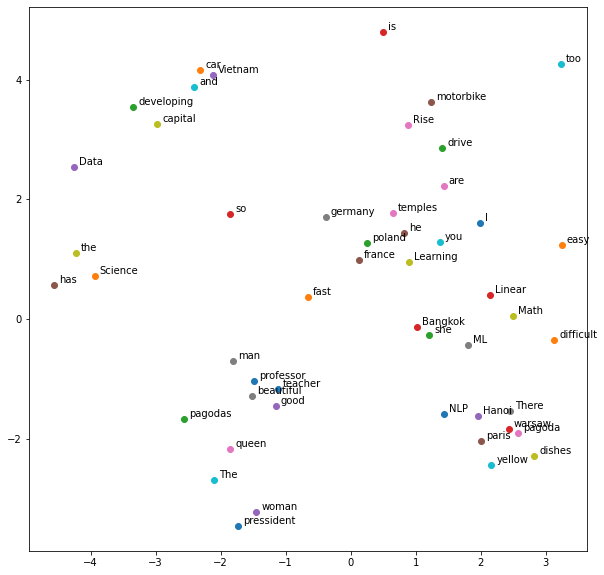

In [91]:
plt.figure(figsize=(10,10))
for i, word in enumerate(vocabs[:50]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

We have :
the time of the normal version of skipgrams\
Epoch 1000 | Loss: 4.833241 | time: 1.3383855819702148
Epoch 2000 | Loss: 5.114820 | time: 2.630401134490967
Epoch 3000 | Loss: 1.729257 | time: 4.274210453033447
Epoch 4000 | Loss: 5.219905 | time: 5.806239604949951
Epoch 5000 | Loss: 2.898548 | time: 7.312983989715576

the time of the negative sampling version of skipgrams\
Epoch 1000 | Loss: 0.833845 | time: 1.60760498046875\
Epoch 2000 | Loss: 0.193061 | time: 3.184335947036743\
Epoch 3000 | Loss: 0.418808 | time: 4.759375333786011\
Epoch 4000 | Loss: 0.011292 | time: 6.349442720413208\
Epoch 5000 | Loss: 0.001412 | time: 7.930240631103516

We will easily see that the time of the normal version of skipgrams will be less than the time of the negative sampling version of skipgrams.